In [16]:
# IMPORTING ESSENTIAL PACKAGES
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow import keras

In [17]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.layers import Dropout

In [18]:
#OBTAINIG DATASETS FROM TENSOR FLOW
from tensorflow.keras.datasets import mnist


In [22]:
#SPLITTING THE DATA
#BATCH SIZE REPRESENTS DIVIDING THE WHOLE DATASETS AND PROCESSING TO BUILD MODEL
#REDUCES THE PROCESSING TIME OF SYSTEM
batch_size = 128
# REPRESENTS 0 TO 9
num_classes = 10
# REPRESENTS PROCESSING OF 2 BATCH SIZES AS 2 EPOCH
epochs = 2

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize to 0 to 1 range,input normalisation and preprocessiing of data
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


Label: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


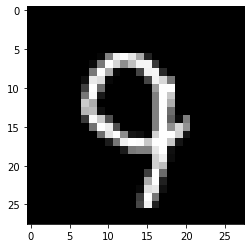

In [24]:
#VISUALISNG OUR INPUT DATASET BY SPECIFIC NUMBERS
print("Label:",y_test[999:1000])
plt.imshow(x_test[999:1000].reshape(28,28), cmap='gray')
plt.show()

In [25]:
#DESIGNING AND MODEL IN A SEQUENTIAL MANNER 
#WITH 3 LAYERS AS SIGMOID/RELU AND ONE LAYER AS SOFTMAX FOR PROBABILITY AND ACTIVATION OF SINGLE NODE
#HIDDEN LAYER OF NODES 32
first_layer_size = 32
model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,1)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#782*32=25088+32= 25120  TOTAL NUMBER OF WEIGHS FOR FIRST LAYER


Shape of First Layer (784, 32)
Visualization of First Layer


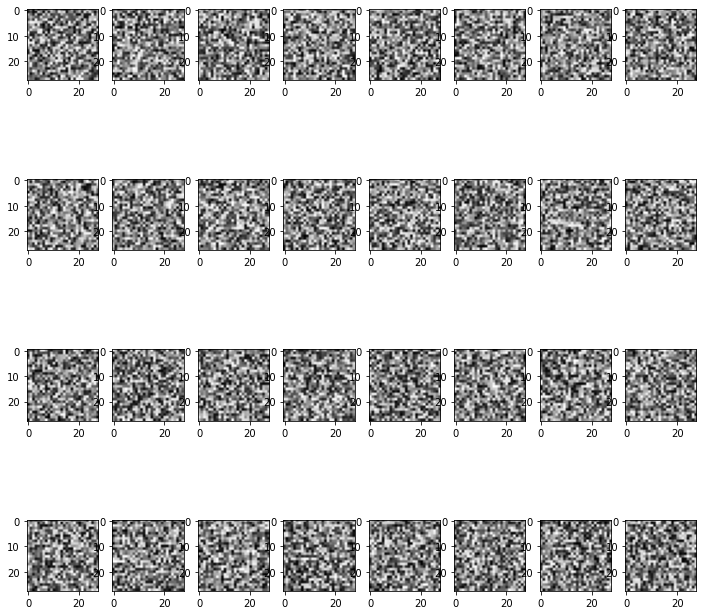

In [26]:
#WEIGHS BEFORE TRAINNING AND ITS RANDOM.
#VISUALISNG OUR FIRST LAYER 
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

In [27]:
 tf.compat.v1.train.Optimizer


tensorflow.python.training.optimizer.Optimizer

In [37]:
#COMPILING FOR MULTICLASS CLASSIFICATION 
model.compile(loss='categorical_crossentropy',
       
        metrics=['accuracy'])

In [41]:
#TRAINNING INPUT AND OUTPUT AND EPOCH-2,VERBOSE MAKE OUTPUT VISIBLE
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0)

In [ ]:
#TRAINING ACCURACY INCREASES WHEN EPOCHS RUNS FOR MULTIPLE TIME 

In [40]:
#TESTING
# Write the testing input and output variables
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.25055569410324097
Test accuracy: 0.9308000206947327


In [ ]:
#MODEL'S ACCURACY SCORES HAVE BEEN IMPROVED AFTER TRAINING.

Shape of First Layer (784, 32)
Visualization of First Layer


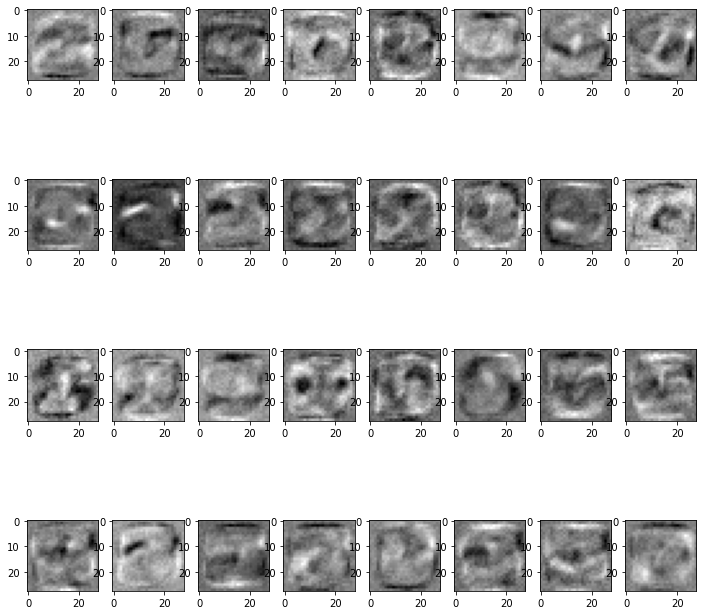

In [42]:
#VISUALISNG OUR FIRST LAYER AFTER TESTING AND SEEMS BIT CLEAR AFTER TRAINNG
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

In [44]:

prediction = model.predict(x_test[222:223])
prediction = prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

Prediction
 [3.4483866e-04 1.0907737e-03 9.8752391e-01 4.7149635e-03 3.2210510e-04
 1.1098852e-05 1.6332455e-03 3.4866303e-03 7.6762575e-04 1.0477946e-04]

Thresholded output
 [0 0 1 0 0 0 0 0 0 0]


In [47]:
sum(prediction)
# the soft max score must be equal to one

0.9999999741967258

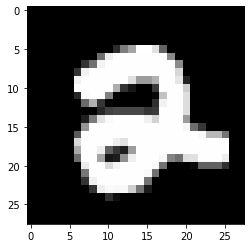

In [46]:
plt.imshow(x_test[222:223].reshape(28,28),cmap='gray')
plt.show()

In [ ]:
#CAN TRAIN OUR MODEL WITH ANY JPG IMAGE SINCE OUR MODEL HAS 95 % ACCURACY.